In [39]:
import json

with open('maximin_values.json') as f:
    mm_list = json.load(f)

In [40]:
mm_dict = dict()
for approach in ('mip', 'fairim'):
    for attribute in ('age', 'gender', 'ethnicity'):
        mm_dict[(approach, attribute)] = [i['maximin'] for i in mm_list 
                                          if (i['method'] == approach and i['attribute'] == attribute)]

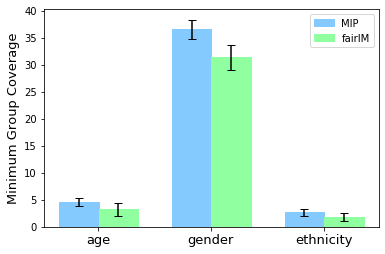

In [42]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np


values = []
for attribute in ('age', 'gender', 'ethnicity'):
    for approach in ('mip', 'fairim'):
        values.append(mm_dict[(approach, attribute)])

means = [np.mean(v) for v in values]
stds = [np.std(v) for v in values]
xpos = []
for i in range(3):
    xpos.append(i)
    xpos.append(i + 0.35)

bars = plt.bar(xpos, means, yerr=stds, align='center', capsize=4, width=0.35)
colors = ['#85caff', '#8fffa0'] * 3
for i in range(6):
    bars[i].set_color(colors[i])
    
labels = ('age', 'gender', 'ethnicity')
locs = [i + 0.17 for i in range(3)]
_ = plt.xticks(locs, labels, fontsize=13)

_ = plt.ylabel('Minimum Group Coverage', fontsize=13)
_ = plt.legend(bars[:2], ('MIP', 'fairIM'))
_ = plt.savefig('images/minimax.svg', bbox_inches='tight')